In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic Statistics and Visualizations


In [2]:
raw_interactions = pd.read_csv('data/raw_data/RAW_interactions.csv')
raw_interactions.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [3]:
raw_recipes = pd.read_csv('data/raw_data/RAW_recipes.csv')
raw_recipes.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [4]:
raw_recipes.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [5]:
# Explore the steps column in raw_recipes
print("Basic info about steps column:")
print(f"Total recipes: {raw_recipes.shape}")
print(f"Non-null steps: {raw_recipes['steps'].notna().sum()}")
print(f"Null steps: {raw_recipes['steps'].isna().sum()}")
print()

# Look at some example steps
print("Sample steps (first 3 non-null entries):")
sample_steps = raw_recipes[raw_recipes['steps'].notna()]['steps'].head(3)
for i, steps in enumerate(sample_steps, 1):
    print(f"\nRecipe {i} steps:")
    print(steps[:200] + "..." if len(str(steps)) > 200 else steps)

Basic info about steps column:
Total recipes: (231637, 12)
Non-null steps: 231637
Null steps: 0

Sample steps (first 3 non-null entries):

Recipe 1 steps:
['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', ...

Recipe 2 steps:
['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk ...

Recipe 3 steps:
['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook...


In [6]:
# Parse steps and analyze step count distribution
import ast

def safe_parse_steps(steps_str):
    """Safely parse steps string to list"""
    if pd.isna(steps_str):
        return []
    try:
        # Handle both string representations of lists and actual strings
        if isinstance(steps_str, str) and steps_str.startswith('['):
            return ast.literal_eval(steps_str)
        elif isinstance(steps_str, str):
            return [steps_str]  # Single step as string
        else:
            return []
    except:
        return []

# Apply parsing
raw_recipes['steps_list'] = raw_recipes['steps'].apply(safe_parse_steps)
raw_recipes['step_count'] = raw_recipes['steps_list'].apply(len)

print("Step count statistics:")
print(raw_recipes['step_count'].describe())

raw_recipes[ raw_recipes['step_count'] != raw_recipes['n_steps'] ]


Step count statistics:
count    231637.000000
mean          9.765499
std           5.995128
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max         145.000000
Name: step_count, dtype: float64


Empty DataFrame
Columns: [name, id, minutes, contributor_id, submitted, tags, nutrition, n_steps, steps, description, ingredients, n_ingredients, steps_list, step_count]
Index: []

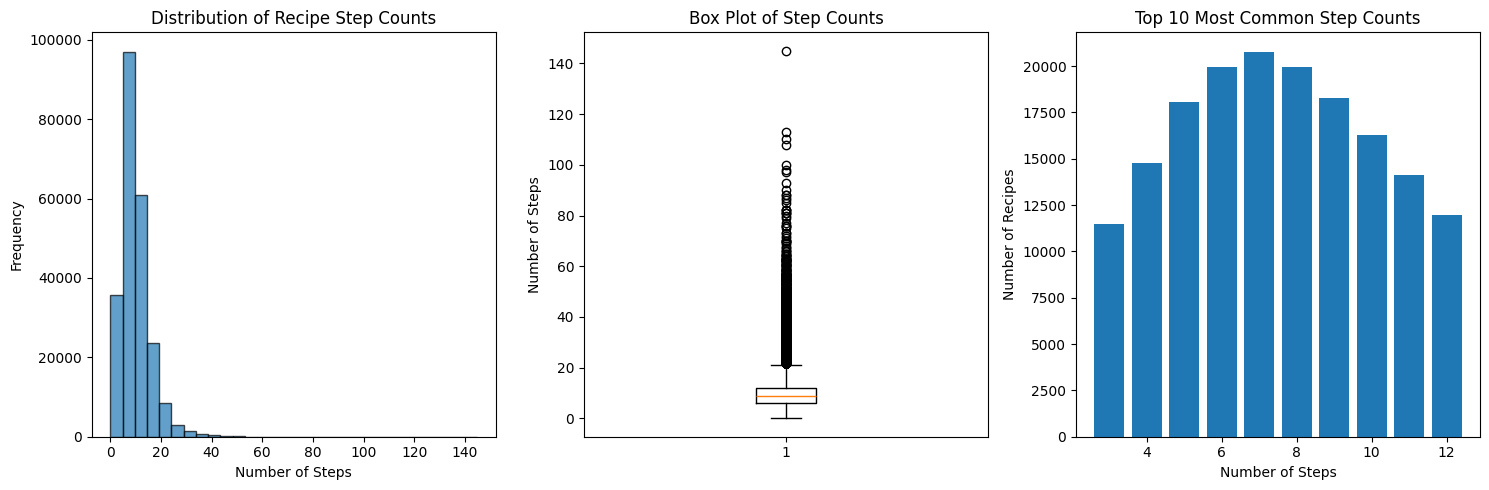

In [7]:
# Visualize step count distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(raw_recipes['step_count'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Recipe Step Counts')

plt.subplot(1, 3, 2)
plt.boxplot(raw_recipes['step_count'])
plt.ylabel('Number of Steps')
plt.title('Box Plot of Step Counts')

plt.subplot(1, 3, 3)
step_counts = raw_recipes['step_count'].value_counts().head(10)
plt.bar(step_counts.index, step_counts.values)
plt.xlabel('Number of Steps')
plt.ylabel('Number of Recipes')
plt.title('Top 10 Most Common Step Counts')

plt.tight_layout()
plt.show()

## Use Wikidata to get the list of utensils used in the recipes

### Use all the subclasses of tools (Q39546) as utensils

In [ ]:
import requests
import json
import re

LANGS = "en"  # only search for tools in english

QUERY = f"""
SELECT DISTINCT ?item ?itemLabel ?alias WHERE {{
  ?item wdt:P279* wd:Q39546 .  # subclasses of Tool
  SERVICE wikibase:label {{ bd:serviceParam wikibase:language "{LANGS}". }}
  OPTIONAL {{ ?item skos:altLabel ?alias FILTER (LANG(?alias) IN ({','.join(f'"{l}"' for l in LANGS.split(','))})) }}
}}

"""

def fetch_all_tools():
    try:
        r = requests.get(
            "https://query.wikidata.org/sparql",
            params={"query": QUERY, "format": "json"},
            timeout=120,
            headers={"User-Agent": "all-tools-vocab/1.0"}
        )
        r.raise_for_status()
        
        # Handle potential JSON decode errors
        try:
            rows = r.json()["results"]["bindings"]
        except json.JSONDecodeError as e:
            print(f"JSON decode error: {e}")
            print("Attempting to clean response text...")
            # Remove control characters except newlines and tabs
            clean_text = re.sub(r'[\x00-\x08\x0B-\x0C\x0E-\x1F\x7F]', '', r.text)
            data = json.loads(clean_text)
            rows = data["results"]["bindings"]
            
    except Exception as e:
        print(f"Error fetching data: {e}")
        print("Using fallback predefined kitchen tools list...")
        return get_fallback_tools()

    def val(row, key):
        return row[key]["value"] if key in row else None

    vocab = set()
    surface_to_canonical = {}   # lowercased surface -> {"qid": "...", "label": "..."}
    qid_to_label = {}

    for row in rows:
        item_uri = val(row, "item")  # e.g., "http://www.wikidata.org/entity/Q23323"
        if not item_uri:
            continue
            
        qid = item_uri.rsplit("/", 1)[-1]
        label = val(row, "itemLabel")
        alias = val(row, "alias")

        if label:
            qid_to_label[qid] = label
            s = label.lower()
            vocab.add(s)
        #    surface_to_canonical.setdefault(s, {"qid": qid, "label": label})

        if alias:
            s = alias.lower()
            vocab.add(s)
        #     # Prefer first-seen canonical; you can also store a list if you like
        #     surface_to_canonical.setdefault(s, {"qid": qid, "label": label or qid_to_label.get(qid, qid)})

    return vocab # , surface_to_canonical

TOOL_VOCAB = fetch_all_tools()
print(f"Loaded {len(TOOL_VOCAB):,} tool surface forms.")


Loaded 222,719 tool surface forms.


In [18]:
def contains_tool(text: str) -> dict:
    """Returns dictionary of found tools with their positions"""
    t = text.lower()
    t = t.split(' ')
    print(t)
    found_tools = {}
    for ind, term in enumerate(TOOL_VOCAB):
        if term in t:
            found_tools[term] = ind
    
    return found_tools

# def which_tools(text: str):
#     t = text.lower()
#     found = {term for term in TOOL_VOCAB if term in t}
#     # map to canonical QIDs/labels
#     return sorted({(term, TOOL_LOOKUP[term]["qid"], TOOL_LOOKUP[term]["label"]) for term in found})

In [20]:
#print(TOOL_LOOKUP)
print(TOOL_VOCAB)
contains_tool("water car knife")

{'ge u30b', 'schwenker gespann', 'boa', 'q2399657', 'q9333472', 'ruben-mallory', 'stockholm metro c7', 'sinsimia', 'xoj-3', 'm350', 'lansen fighter', 'lockheed ec-130e airborne battlefield command and control center', 'plm 6101 to 6171', 'garbage bin', 'sim card eject tool', 'db-9 connector', 'usra light mountain', 'anand', 'dr class 199.8', 'thermionic diode', 'fairchild camera', 'original production aircraft', 'g38', 'karosa c 834', "kerr's patent revolver", 'peugeot pulsion', 'cfa inox', 'chandra valayam', 'mandolin guitar zither', 'clevis', 'beechcraft model a23a', 'skywarrior b vip', 'cam nut', 'penetrator round', 'ss 1400 class', 'амберавто', 'ifv(w)', 'supermarine type 370', 'neck knife', 'titan ua1206', 'q25456759', 'chawan', 'vickers vc10 k mk.3', 'video sports vs-5', 'dhc1b2s1', 'lancia kappa', 'zigzag transformer', 'meizu 15', 'logitech harmony', 'martin-baker mk.1', 'bark', 'douglas ya-3a', 'transbook', 'sau 40', 'marauder bomber', 'norfolk & western class y2', 'selective m

{'car': 7078, 'knife': 204146}

### Check Later !!!
#### Until now, we have been working with all the tools (not necessarily found in kitchen)

In [ ]:
import requests

# ---- Kitchen-focused roots for extra recall ----
KITCHEN_ROOTS = [
    "wd:Q3773693",  # kitchen utensil
    "wd:Q154038",   # cookware and bakeware
    "wd:Q851782",   # tableware
    "wd:Q57583712", # cooking appliance
    "wd:Q212920",   # home appliance (contains many kitchen appliances)
]

# Uses (P366) that imply kitchen context
USES = [
    "wd:Q177",      # cooking
    "wd:Q243643",   # food preparation
    "wd:Q81931",    # baking
]

QUERY = f"""
SELECT DISTINCT ?item ?itemLabel ?alias ?desc WHERE {{
  {{
    # A) Start from root 'tool' and keep only items whose 'use' is cooking/food prep/baking
    ?item wdt:P279* wd:Q39546 .
    ?item wdt:P366 ?u .
    VALUES ?u {{ {' '.join(USES)} }}
  }}
  UNION
  {{
    # B) Also include the kitchen-focused taxonomies (good coverage of utensils/cookware/appliances)
    VALUES ?root {{ {' '.join(KITCHEN_ROOTS)} }}
    ?item wdt:P279* ?root .
  }}

  # Labels, aliases, descriptions (English + French example)
  SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en,fr". }}
  OPTIONAL {{ ?item skos:altLabel ?alias FILTER(LANG(?alias) IN ("en","fr")) }}
  OPTIONAL {{ ?item schema:description ?desc FILTER(LANG(?desc) IN ("en","fr")) }}
}}
"""

def fetch_kitchen_tools_vocab():
    r = requests.get(
        "https://query.wikidata.org/sparql",
        params={"query": QUERY, "format": "json"},
        timeout=60,
        headers={"User-Agent":"kitchen-tool-vocab/1.0"}
    )
    r.raise_for_status()
    rows = r.json()["results"]["bindings"]

    def val(row, key):
        return row[key]["value"] if key in row else None

    labels = {val(row, "itemLabel").lower() for row in rows if val(row, "itemLabel")}
    aliases = {val(row, "alias").lower() for row in rows if val(row, "alias")}

    # Optional heuristic: keep only terms that look tool-like (helps precision if you pull 'home appliance')
    keep_tokens = ("cook", "kitchen", "bake", "food", "knife", "pan", "pot", "spoon", "fork", "oven", "grill", "mixer", "blender", "toaster", "dishwasher")
    vocab = {w for w in (labels | aliases) if any(t in w for t in keep_tokens)} | {"knife"}  # ensure 'knife'

    return vocab

TOOL_VOCAB = fetch_kitchen_tools_vocab()

def contains_kitchen_tool(text: str) -> bool:
    tl = text.lower()
    return any(term in tl for term in TOOL_VOCAB)

def which_kitchen_tools(text: str):
    tl = text.lower()
    return sorted({term for term in TOOL_VOCAB if term in tl})


In [ ]:
import nltk
import requests


QUERY = """
SELECT ?item ?itemLabel ?alias WHERE {
  VALUES ?roots { wd:Q3773693 wd:Q1521410 }  # kitchen utensil, kitchenware
  ?item wdt:P279* ?roots .                   # subclasses / instances under roots
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  OPTIONAL { ?item skos:altLabel ?alias FILTER (LANG(?alias)="en") }
}
"""

url = "https://query.wikidata.org/sparql"
r = requests.get(url, params={"query": QUERY, "format": "json"})
r.raise_for_status()
rows = r.json()["results"]["bindings"]

labels = {row["itemLabel"]["value"] for row in rows if "itemLabel" in row}
aliases = {row["alias"]["value"] for row in rows if "alias" in row}

print("knife".lower() in labels)
print("knife".lower() in aliases)


#tool_vocab = {s.lower() for s in (labels | aliases)}
#print(list(sorted(x for x in tool_vocab if "knife" in x))[:20])  # sanity check

False
False
